<a href="https://colab.research.google.com/github/boseull/tensorflow_example/blob/main/tensorflow_%EB%AA%A8%EB%8D%B8_%EC%A0%80%EC%9E%A5%EA%B3%BC_%EB%B3%B5%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신 러닝 기술자들이 제공하는 것

*   모델 만드는 코드
*   모델의 훈련된 가중치 또는 파라미터



##import

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.5.0


## 데이터셋 받기

In [ ]:
(train_images_1, train_labels_1), (test_images_1, test_labels_1) = tf.keras.datasets.mnist.load_data()


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

print(train_images.shape)
train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0 
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0
print(train_images.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(1000, 784)


[  0   0   0   0   0   0   0   0   0  48 238 252 252 179  12  75 121  21
   0   0 253 243  50   0   0   0   0   0]


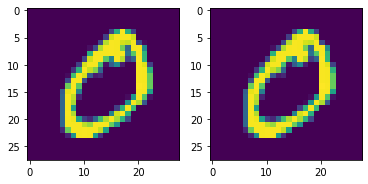

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(train_images_1[1])
plt.subplot(1, 2, 2)
plt.imshow(train_images_1[1]/100.0)
print(train_images_1[1][10])


In [ ]:
train_labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6,
       3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
       9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9,
       6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8,

라벨 : 0-9의 수  
이미지 : 28*28 픽셀 6만장 -> flatten 1000장  
0-255의 픽셀값 -> 0-1의 픽셀값

##모델 정의

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([keras.layers.Dense(512, activation='relu', input_shape=(784,)), keras.layers.Dropout(0.2), keras.layers.Dense(10)])

  model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


sparse categorical crossentropy : 멀트클래스, 정수 형태 라벨

## 훈련하는 동안 체크포인트 저장하기
#### 체크포인트 콜백 사용

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[cp_callback])

Epoch 1/10
32/32 [==============================] - 1s 12ms/step - loss: 1.1755 - accuracy: 0.6570 - val_loss: 0.7222 - val_accuracy: 0.7900

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 0.4340 - accuracy: 0.8740 - val_loss: 0.5274 - val_accuracy: 0.8430

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 0.2771 - accuracy: 0.9240 - val_loss: 0.4696 - val_accuracy: 0.8560

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 0.2039 - accuracy: 0.9490 - val_loss: 0.4505 - val_accuracy: 0.8570

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 0.1577 - accuracy: 0.9690 - val_loss: 0.3991 - val_accuracy: 0.8740

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/10
32/32 [==============================] - 0s

콜백 : 다른 함수에 의해 불려지는 함수 다른 함수에서 불려지기 위해 생성  
training_1에 에포크가 종료될 때마다 가중치 저장  

In [ ]:
%ls {checkpoint_dir}

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


훈련하지 않은 새 모델을 만들어 기존 모델의 가중치 복원.

In [ ]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("훈련되지 않은 모델의 정확도: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 2.2851 - accuracy: 0.1320
훈련되지 않은 모델의 정확도: 13.20%


가중치 로드

In [ ]:
model.load_weights(checkpoint_path)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 0.4163 - accuracy: 0.8690
복원된 모델의 정확도: 86.90%


##체크포인트 콜백 매개변수

In [ ]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, period=5)

model = create_model()

model.save_weights(checkpoint_path.format(epoch=0)) #cp-0000 체크포인트 주소에 가중치 저장 훈련을 안시켰는데 저장이 되네

model.fit(train_images, train_labels, epochs=50, callbacks=[cp_callback], validation_data=(test_images, test_labels), verbose=0)

<built-in method format of str object at 0x7f5848e25c10>

Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [ ]:
print(checkpoint_path.format(epoch=0))
model.save_weights()

training_2/cp-0000.ckpt


In [ ]:
%ls {checkpoint_dir}

checkpoint                        cp-0025.ckpt.index
cp-0000.ckpt.data-00000-of-00001  cp-0030.ckpt.data-00000-of-00001
cp-0000.ckpt.index                cp-0030.ckpt.index
cp-0005.ckpt.data-00000-of-00001  cp-0035.ckpt.data-00000-of-00001
cp-0005.ckpt.index                cp-0035.ckpt.index
cp-0010.ckpt.data-00000-of-00001  cp-0040.ckpt.data-00000-of-00001
cp-0010.ckpt.index                cp-0040.ckpt.index
cp-0015.ckpt.data-00000-of-00001  cp-0045.ckpt.data-00000-of-00001
cp-0015.ckpt.index                cp-0045.ckpt.index
cp-0020.ckpt.data-00000-of-00001  cp-0050.ckpt.data-00000-of-00001
cp-0020.ckpt.index                cp-0050.ckpt.index
cp-0025.ckpt.data-00000-of-00001


모델 초기화 후 체크포인트 로드

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

In [ ]:
model = create_model()

model.load_weights(latest)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 0.4859 - accuracy: 0.8760
복원된 모델의 정확도: 87.60%


##수동으로 가중치 저장하기

In [ ]:
model.save_weights('./checkpoints/my_checkpoint')

model = create_model()

model.load_weights('./checkpoints/my_checkpoint')

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 0.4859 - accuracy: 0.8760
복원된 모델의 정확도: 87.60%


In [ ]:
%ls './checkpoints'

checkpoint  my_checkpoint.data-00000-of-00001  my_checkpoint.index


##전체 모델 저장하기
#### 모델의 구조, 가중치, 훈련 설정을 하나의 파일/폴더에 저장

원본 파이썬 코드 불필요, 옵티마이저 상태가 복원되므로 정확히 중지한 시점에서 훈련 재시작  
'SavedModel', 'HDF5' 두가지 포맷으로 저장 가능  

SavedModel 포맷

In [ ]:
model = create_model()
model.fit(train_images, train_labels, epochs=5)

%mkdir -p saved_model
model.save('saved_model/my_model')

Epoch 1/5
32/32 [==============================] - 0s 4ms/step - loss: 1.1443 - accuracy: 0.6980
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.4246 - accuracy: 0.8840
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.2768 - accuracy: 0.9320
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.2059 - accuracy: 0.9550
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.1576 - accuracy: 0.9680
INFO:tensorflow:Assets written to: saved_model/my_model/assets


SavedModel : 프토토콜 버퍼 이진 파일 + 텐서플로 체크포인트

In [ ]:
%ls saved_model/
%ls saved_model/my_model/

my_model/
assets/  keras_metadata.pb  saved_model.pb  variables/


저장된 모델로부터 새로운 케라스 모델 로드

In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

new_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


원본 모델과 동일한 매개변수로 컴파일 됨

In [ ]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

32/32 - 0s - loss: 0.4256 - accuracy: 0.8660
복원된 모델의 정확도: 86.60%


##HDF5 파일로 저장

In [ ]:
model = create_model()
model.fit(train_images, train_labels, epochs=5)

model.save('my_model.h5')

Epoch 1/5
32/32 [==============================] - 0s 4ms/step - loss: 1.1263 - accuracy: 0.6950
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.4182 - accuracy: 0.8830
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.2960 - accuracy: 0.9180
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.2010 - accuracy: 0.9590
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.1600 - accuracy: 0.9650


In [ ]:
new_model = tf.keras.models.load_model('my_model.h5')

new_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

32/32 - 0s - loss: 0.4038 - accuracy: 0.8710
복원된 모델의 정확도: 87.10%


저장되는 값 : 가중치 값, 모델 구조, 모델의 훈련 설정, 옵티마이저와 옵티마이저 상태



HDF5 : 객체로 모델 구조 저장  
SavedModel : 실행 그래프로 저장  
--->원본 코드 없이 사용자 정의 객체 저장 불가  